In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

### Дипломный проект 
##  «Модель прогнозирования стоимости жилья для агентства недвижимости»

In [115]:
df = pd.read_csv('data.csv', sep = ',')
df.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

### Описание данных:  
➔ 'status' — статус продажи;  
➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;  
➔ 'propertyType' — тип объекта недвижимости;  
➔ 'street' — адрес объекта;  
➔ 'baths' — количество ванных комнат;  
➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);  
➔ 'fireplace' — наличие камина;  
➔ 'city' — город;  
➔ 'schools' — сведения о школах в районе;  
➔ 'sqft' — площадь в футах;  
➔ 'zipcode' — почтовый индекс;  
➔ 'beds' — количество спален;  
➔ 'state' — штат;  
➔ 'stories' — количество этажей;  
➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);  
➔ 'target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).  

у нас 377185 строк и 18 признаков, один целевой, есть одинаковые признаки: private pool' и 'PrivatePool' , mls-id' и 'MlsId'  

В признаке .homeFacts. - данные в виде словаря, в признаке schools данные в виде списка, в котором словарь. Рассмотрим их позже.

In [116]:
# Проверим наличие дубликатов
dupl_columns = list(df.columns)

mask = df.duplicated(subset=dupl_columns)

df_duplicates = df[mask]
print(f'Число найденных дубликатов: {df_duplicates.shape[0]}')

Число найденных дубликатов: 50


In [117]:
# их немного, удалим дубликаты
df= df.drop_duplicates(subset=dupl_columns)

In [118]:
# Посмотрим признаки на наличие признаков и их количество
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

private pool    98.891378
mls-id          93.386453
PrivatePool     89.311520
fireplace       72.659393
stories         39.952272
baths           28.188315
beds            24.196640
MlsId           17.730786
sqft            10.752118
status          10.584274
propertyType     9.209699
target           0.657589
city             0.009015
street           0.000530
dtype: float64

Видим, что признаки private pool, mls, PrivatePool, fireplace, stories имеют больше 30% пропусков  
Признаки бассейн и камин удалять не будем, будем считать наличие пропуска - отстутствие в доме  
Признак stories -  удалим  
'mls-id', 'MlsId' - посмотрим на эти признак

In [258]:
df[['mls-id', 'MlsId']]

,mls-id,MlsId
0,NaN,611019
1,NaN,201916904
2,NaN,FR19221027
3,NaN,14191809
4,NaN,861745
...,...,...
377180,NaN,A10702700
377181,NaN,10374233
377182,NaN,NaN
377183,NaN,NaN


эти признаки так же удалим, они не информативны

In [119]:
df.drop(['stories', 'mls-id', 'MlsId'], axis = 1, inplace=True)

In [120]:
# Удалим признаки, где боьлше 5 пропусков в строке
m = df.shape[1]
df = df.dropna(thresh=m-5, axis=0)
print(f'Оставшееся число строк: {df.shape[0]}')

Оставшееся число строк: 331492


Расссмотрим остальные признаки

### target

In [9]:
# проверим пустые значения
df['target'].isna().value_counts(normalize=True)

target
False    0.994495
True     0.005505
Name: proportion, dtype: float64

In [121]:
# пустых значений менее 1 %, удалим их
df = df.dropna(subset=['target'])

In [530]:
df['target']

0           $418,000
1           $310,000
2         $2,895,000
3         $2,395,000
5           $209,000
             ...    
377179      $799,000
377180    $1,249,000
377181      $674,999
377182      $528,000
377184      $204,900
Name: target, Length: 329667, dtype: object

In [122]:
# преобразуем признак
def pr_price(x):
    x=int(x.replace('$','').replace(',','').replace('+', '').replace('/mo', '').replace('1215 - 1437','1214'))
    return x

In [123]:
df['target']= df['target'].apply(pr_price)

In [13]:
# Посмотрим описание признака
df['target'].describe()

count    3.296670e+05
mean     6.364285e+05
std      1.789606e+06
min      1.000000e+00
25%      2.005965e+05
50%      3.300000e+05
75%      5.850000e+05
max      1.950000e+08
Name: target, dtype: float64

Из описания минимум 1 - явный выброс, максимальное значение сильно больше 75-квантили, тоже похоже на выброс

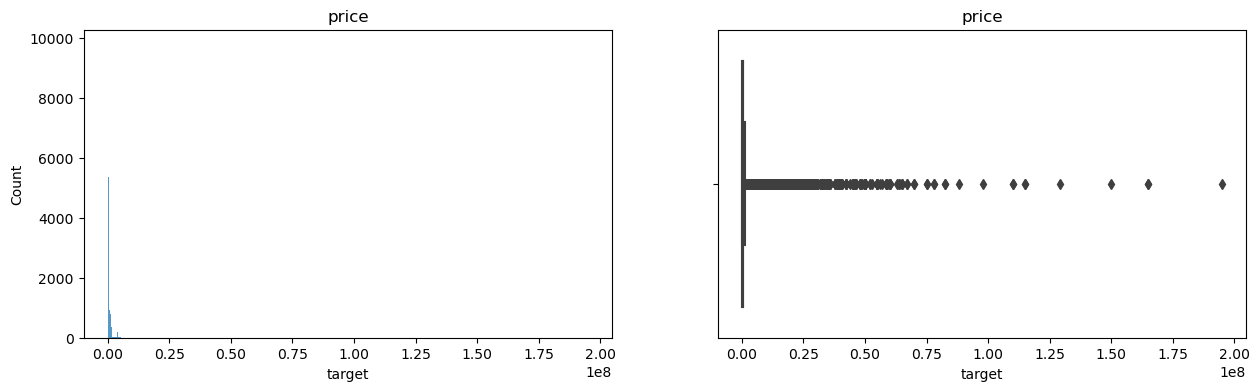

In [534]:
# Визуализируем признак
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4)) 
histplot = sns.histplot(data=df, x='target', ax=axes[0]);
histplot.set_title('price');
boxplot = sns.boxplot(data=df, x='target', ax=axes[1]);
boxplot.set_title('price');

с помощью метода Тьюки найдем выбросы, правую границу сдвинем (исходя из графика)

In [124]:
def outliers_iqr(data, feature, left=1, right=6):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
    lower_bound = quartile_1 - (right* iqr)
    upper_bound = quartile_3 + (left * iqr)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [125]:
outliers, cleaned = outliers_iqr(df, 'target')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 40291
Результирующее число записей: 289376


Посмотрим данные после удаления выбросов по методу Тьюки

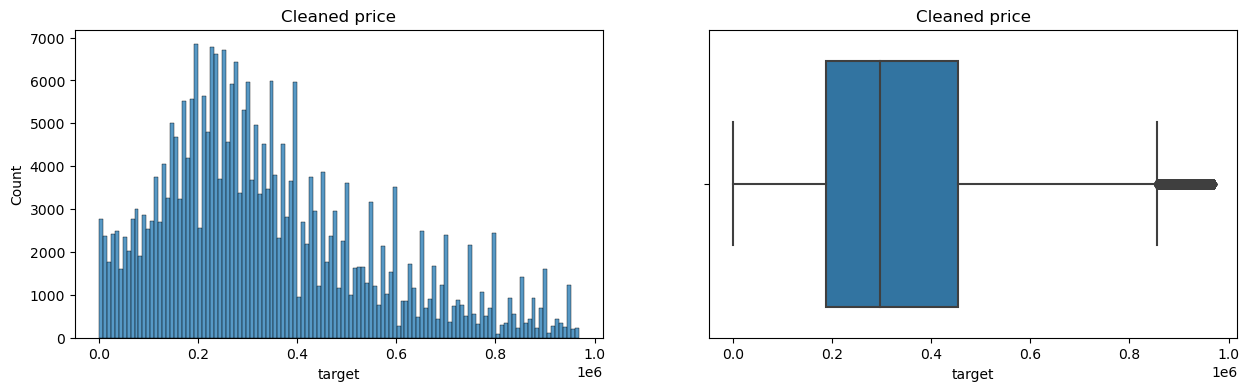

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='target', ax=axes[0]);
histplot.set_title('Cleaned price');
boxplot = sns.boxplot(data=cleaned, x='target', ax=axes[1]);
boxplot.set_title('Cleaned price');

Теперь больше похоже на нормальное распределение, хотя справа все равно хвост, оставим как есть и есть значения около 0, что странно для цены недвижимости

In [126]:
df = cleaned.copy()

In [127]:
# Посмотрим снова описание признака
df['target'].describe()

count    289376.000000
mean     340436.908213
std      213222.962180
min           1.000000
25%      187990.000000
50%      295900.000000
75%      454900.000000
max      969000.000000
Name: target, dtype: float64

In [128]:
df = df[df['target']>100000] #удалим значения 

In [129]:
df = df[df['target']<650000] #удалим значения 

In [130]:
df['target'].describe()

count    228225.000000
mean     319388.084504
std      136579.976207
min      100050.000000
25%      211000.000000
50%      295490.000000
75%      410000.000000
max      649999.000000
Name: target, dtype: float64

### status

In [23]:
df['status'].value_counts()[0:15]

status
for sale                     96401
Active                       53943
For sale                     29743
New construction              3758
Pending                       3359
foreclosure                   3231
Pre-foreclosure               1642
Under Contract Show           1001
Pre-foreclosure / auction      940
P                              932
Under Contract   Showing       661
Under Contract                 610
 / auction                     593
Contingent                     418
New                            410
Name: count, dtype: int64

Из данных видим, что это статусы: в продаже, подписан контрак, и т.д. не инормативен для нас, удалим

In [131]:
df.drop(['status'], axis = 1, inplace=True)

### pool

In [25]:
# Рассмотрим признаки 'private pool' и 'PrivatePool'
df['private pool'].value_counts()

private pool
Yes    2721
Name: count, dtype: int64

In [26]:
df['PrivatePool'].value_counts()

PrivatePool
yes    17481
Yes     6129
Name: count, dtype: int64

In [132]:
# Будем считать, что пустые значения значат отсутствие бассейна, заменим на 0, 1 - наличие бассейна
df['PrivatePool'] = df['PrivatePool'].apply(lambda x: 1 if x=='yes' or x=='Yes'  else 0)
df['private pool'] = df['private pool'].apply(lambda x: 1 if x=='Yes'  else 0) 
df['pool'] = df['PrivatePool'] + df['private pool'] # объединим 2 признака в 1
df['pool'].value_counts() 

pool
0    201894
1     26331
Name: count, dtype: int64

Убедились, что нет значений равных 2 (значит в столбцах не дублируется наличие бассейна)  
Удалим лишние признаки

In [133]:
df.drop(['PrivatePool', 'private pool'], axis = 1, inplace=True)

### propertyType

In [29]:
# Рассмотрим признак тип собственности
df['propertyType'].value_counts()[0:50]

propertyType
single-family home                     66308
Single Family                          45159
Single Family Home                     24320
condo                                  16827
Condo                                  11179
townhouse                               8906
Condo/Townhome/Row Home/Co-Op           5957
Townhouse                               5326
Traditional                             4713
multi-family                            2901
Land                                    2688
coop                                    2198
lot/land                                1747
Multi Family                            1517
Ranch                                   1505
Single Detached, Traditional            1340
Contemporary                            1134
1 Story                                 1106
Detached, One Story                     1090
High Rise                               1059
2 Stories                                865
Contemporary/Modern                      8

Из данных видим, что один и тот же тип собственности, записан по-разному  
Преобразуем данные


In [135]:
def f_tp(t):

    if type(t)!=float:
        t = t.lower()
        if 'single' in t or 'detached' in t:
            result = 'single family home'
        elif 'condo'in t:
            result='condo'
        elif 'mobile' in t:
            result = 'mobile'
        elif 'multi' in t:
             result='multi family home'   
        elif 'land' in t:
             result='land'
        elif 'coop' in t or 'co-op' in t:
             result='coop'
        elif 'contemporary' in t:
             result='contemporary'
        elif 'ranch' in t:
             result='ranch'
        elif 'traditional' in t:
             result='traditional'
        elif 'townhouse' in t:
             result='townhouse'
        else:
            result='others' # менее 1% перенесли в other
    else:
        result='others'
            
    return result                     

In [136]:
df['p_type'] = df['propertyType'].apply(f_tp)

In [137]:
df['p_type'].value_counts() # возьмем 10 по популярности значений, остальное заменим 'others'

p_type
single family home    140125
condo                  34715
others                 14795
townhouse              14289
traditional             5565
multi family home       5087
land                    4438
contemporary            2741
coop                    2599
ranch                   2212
mobile                  1659
Name: count, dtype: int64

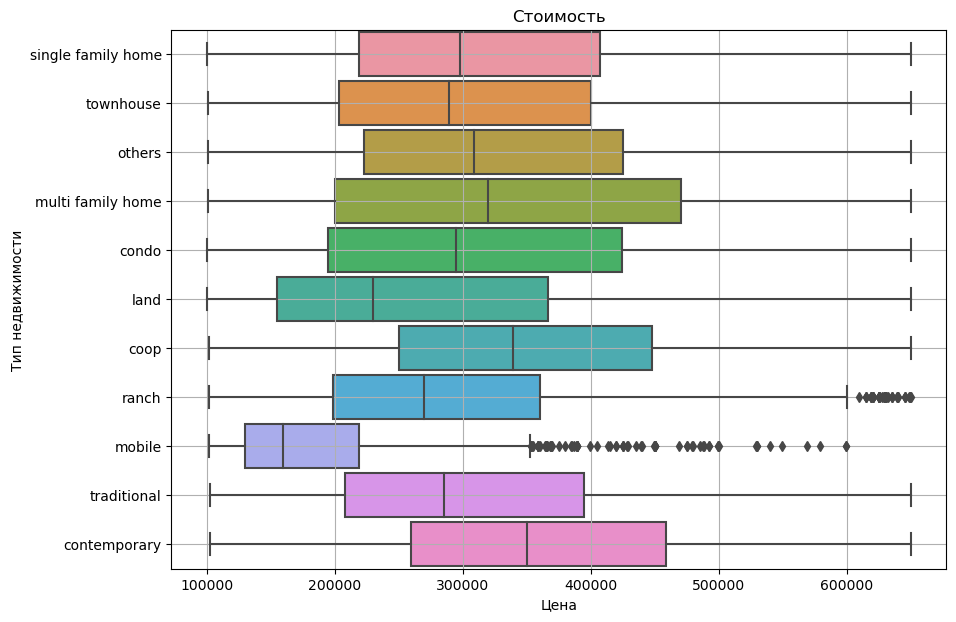

In [33]:
# Построим график распределения цены от вида собственности
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='p_type',
    x='target',
    orient='h',
    width=0.9
)
boxplot.set_title('Стоимость');
boxplot.set_xlabel('Цена');
boxplot.set_ylabel('Тип недвижимости');
boxplot.grid()

land, mobile у данных видом собстенности стоимость в среднем намного ниже , чем у остальных видов собственности

### street

In [39]:
# рассмотрим признак 'street'
df['street'][0:20]

0               240 Heather Ln
1            12911 E Heroy Ave
2            2005 Westridge Rd
3          4311 Livingston Ave
4               1524 Kiscoe St
5            1624 S Newkirk St
6             552 Casanova Ct 
7              6094 Mingle Dr 
8                11182 Owl Ave
9         8612 Cedar Plains Ln
10    14205 Roosevelt Ave #512
11      4222 False Cypress Ln 
12            16373 NW 16th St
13              1538 Umpqua Dr
14          15351 Falmouth Ave
15                930 52nd St 
16            2402 NW 22nd Rd 
17              24 W 126th St 
18          22702 Alderdale Ln
19             1633 NE 15th St
Name: street, dtype: object

В данном признак только улица и номер, мы не можем из него извлечь ничего полезного, удалим его

In [138]:
df.drop(['street'], axis = 1, inplace=True)

### baths

In [139]:
# преобразуем признак

def q_baths(x):
    if type(x)!=float:
        if len(x.split(' '))==1 or x.split(' ')[1].isalpha():
            result=x.split(' ')[0]
        else:
            result=x.split(' ')[1]
    
        result=result.replace('+', '')
        result=result.replace('-', ',')
        result=result.replace(',', '.')
        if result[0].isnumeric():
            result=float(result)
        else:
            result=0        
    else:
        result=0
    result=float(result)
    return result

In [140]:
df['q_baths'] = df['baths'].apply(q_baths)

### fireplace

In [37]:
# рассмотрим признак fireplace
print(df['fireplace'].value_counts()[0:30])

fireplace
yes                             32797
Yes                             13618
1                               10622
Not Applicable                   1851
2                                 952
Fireplace                         468
Living Room                       287
1 Fireplace                       255
Fireplace YN                      249
Wood Burning                      246
No                                243
0                                 226
FAMILYRM                          225
Wood                              196
Special Features                  192
Gas/Gas Logs                      189
Ceiling Fan                       167
Gas Logs, Great Room              165
Great Room                        159
Living Room, Wood Burning         136
FAMILYRM, Gas Logs                123
Fireplace Features                118
Gas Logs, In Great Room           106
Family Room, Wood Burning         105
Gas Logs, In Living Room          102
Gas Logs                          101
3 

In [141]:
# преобразуем признак, наличие камина 1, отсутствие 0 (пустые значения будем считать отсутствием)
df['fireplace'] = df['fireplace'].fillna(0)
df['fireplace'] = df['fireplace'].apply(lambda x:  0 if (x==0 or x=='0' or x=='No' or x=='Not Applicable') else 1)

In [39]:
df['fireplace'].value_counts(normalize=True)

fireplace
0    0.7104
1    0.2896
Name: proportion, dtype: float64

### sqft

In [40]:
# рассмотрим признак sqft
df['sqft'].value_counts()[0:20] 

sqft
0             3234
1,200 sqft     609
1,000 sqft     468
1,100 sqft     413
1,500 sqft     396
1,400 sqft     393
1,800 sqft     367
1,600 sqft     326
800 sqft       321
2,000 sqft     311
900 sqft       301
1,300 sqft     301
--             300
1,440 sqft     271
1,200          237
2,200 sqft     232
750 sqft       231
1,250 sqft     221
2,400 sqft     219
2,100 sqft     218
Name: count, dtype: int64

In [142]:
# преобразуем признак
def f_sqft(s):
    if type(s)!=float:
        s = s.replace(' sqft', '')
        s = s.replace('sqft', '')
        s = s.replace(',', '')
        s = s.split(' ')[-1]
        s = s.split('-')[0]
        if s=='0' or s=='--':
            s=None
        return s

In [143]:
df['sqft'] = df['sqft'].apply(f_sqft)

In [43]:
df['sqft'].isna().value_counts(normalize=True)

sqft
False    0.971414
True     0.028586
Name: proportion, dtype: float64

In [144]:
# Заполним пустые значения 0
df['sqft'] = df['sqft'].fillna(0)

In [145]:
df['sqft'] = df['sqft'].apply(lambda x: int(x) if x!='' else 0)

In [46]:
df['sqft'].value_counts(normalize=True)

sqft
0            0.030518
1200         0.004439
1500         0.003168
1000         0.003093
1400         0.003054
               ...   
52708        0.000004
99552        0.000004
163080       0.000004
64904        0.000004
456602479    0.000004
Name: proportion, Length: 5910, dtype: float64

In [146]:
# числа большие, логарифмируем признак
df['sqft'] = np.log(df['sqft']+1)

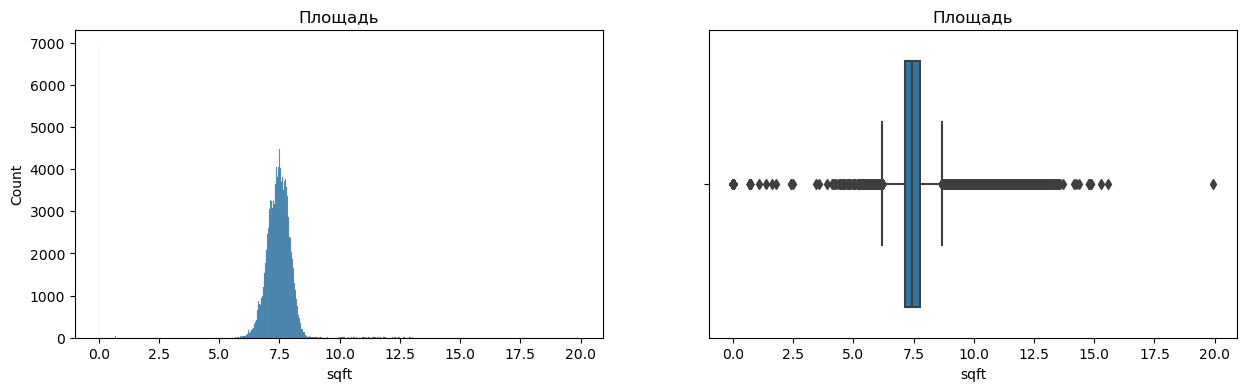

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='sqft', ax=axes[0]);
histplot.set_title('Площадь');
boxplot = sns.boxplot(data=df, x='sqft', ax=axes[1]);
boxplot.set_title('Площадь');

In [147]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
#     lower_bound = quartile_1 - (right* iqr)
#     upper_bound = quartile_3 + (left * iqr)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [148]:
# посмотрим на выбросы в признаке
outliers2, cleaned2 = outliers_iqr(df, 'sqft')
print(f'Число выбросов по методу Тьюки: {outliers2.shape[0]}')
print(f'Результирующее число записей: {cleaned2.shape[0]}')

Число выбросов по методу Тьюки: 9481
Результирующее число записей: 218744


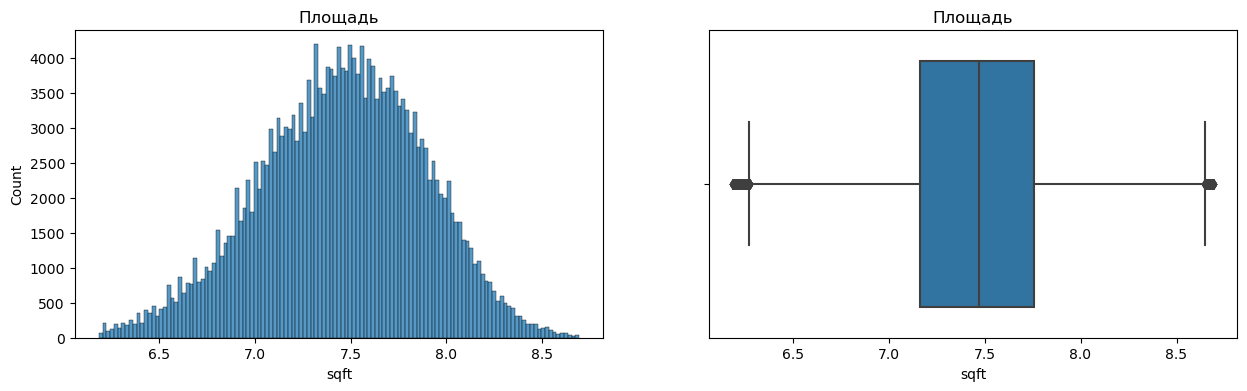

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned2, x='sqft', ax=axes[0]);
histplot.set_title('Площадь');
boxplot = sns.boxplot(data=cleaned2, x='sqft', ax=axes[1]);
boxplot.set_title('Площадь');

In [149]:
df = cleaned2.copy()

### beds

In [54]:
df['beds'][0:20]

0          4
1     3 Beds
5     2 Beds
6        NaN
8          3
9          3
11       NaN
12    4 Beds
13      3 bd
14         4
16     Baths
18    4 Beds
19    4 Beds
20      4 bd
22     Baths
23    4 Beds
24    4 Beds
27    3 Beds
28    4 Beds
31      4 bd
Name: beds, dtype: object

In [150]:
# Рассмотрим признак beds
def q_beds(x):
    if type(x)!=float:

        if 'acr' in x or 'acres' in x or 'sqft' in x:
            return 'unknown'
        if len(x.split(' '))==1 or x.split(' ')[1].isalpha():
            result=x.split(' ')[0]
        else:
            result=x.split(' ')[1]
       
        if result in ['bd', 'Bath','Baths']:
            result=2 #неизвестная заменяем на моду
       
        elif '.' in result and result[0]!='0':
            result=int(x[0:-2])    
        else:
            result=result
    else:
        result=None
    return result

In [151]:
df['q_beds'] = df['beds'].apply(q_beds)

In [152]:
df['q_beds'] = df['q_beds'].fillna(3)
df['q_beds'] = df['q_beds'].apply(lambda x: int(x) if type(x)==int or x.isnumeric() else 0)

### schools

In [61]:
# рассмотрим признак школа
print('пример1: ', df['schools'][0])
print('пример3: ', df['schools'][377176])

пример1:  [{'rating': ['4', '4', '7', 'NR', '4', '7', 'NR', 'NR'], 'data': {'Distance': ['2.7 mi', '3.6 mi', '5.1 mi', '4.0 mi', '10.5 mi', '12.6 mi', '2.7 mi', '3.1 mi'], 'Grades': ['3–5', '6–8', '9–12', 'PK–2', '6–8', '9–12', 'PK–5', 'K–12']}, 'name': ['Southern Pines Elementary School', 'Southern Middle School', 'Pinecrest High School', 'Southern Pines Primary School', "Crain's Creek Middle School", 'Union Pines High School', 'Episcopal Day Private School', 'Calvary Christian Private School']}]
пример3:  [{'rating': ['3/10', '1/10', '3/10'], 'data': {'Distance': ['1.5 mi', '1.3 mi', '1.1 mi'], 'Grades': ['PK-5', '6-8', '9-12']}, 'name': ['Washington Shores Elementary School', 'Carver Middle School', 'Jones High School']}]


Из данных видим информацию о школах: райтинг школ, расстояние до школы, какие классы, названия школ.  
Извлечем из этих данных 4 признака: средний рейтинг школ, максимальный рейтинг школы, среднее рассторяени, минимальное расстояние до школы.  
Эти признаки могут влиять на цену недвижимости

In [153]:
# функция для поиска среднего рейтинга школ
def sch_rating_mean(el):
    rating_list_num = []
    rating_list = eval(el[1:-1])['rating']
    if len(rating_list) == 0:
        r_mean = 0
        return r_mean
    for i in rating_list:
        if i=='' or i==None or i=='NR' or i[0]=='N':
            pass
        else:
            if '/' in i:
                n=int(i.split('/')[0])
            else:
                if i.isnumeric() == True:
                    n = int(i) 
                else:
                    pass
            rating_list_num.append(n)
    if len(rating_list_num) == 0:
        r_mean = 0
    else:
        r_mean = round(sum(rating_list_num) /len(rating_list_num), 2)
    return r_mean

In [154]:
df['sch_rating_mean'] = df['schools'].apply(sch_rating_mean)

In [155]:
# функция для поиска максимального рейтинга школ
def sch_rating_max(el):
    rating_list_num = []
    rating_list = eval(el[1:-1])['rating']
    if len(rating_list) == 0:      
        r_max = 0
        return r_max
    for i in rating_list:
        if i=='' or i[0]=='N':
            pass
        else:
            if '/' in i:
                n=int(i.split('/')[0])
            else:
                if i.isnumeric() == True:   
                    n = int(i) 
                else:
                    pass
            rating_list_num.append(n)
    if len(rating_list_num) == 0: 
        r_max = 0
    else:       
        r_max = max(rating_list_num)
    return r_max

In [156]:
df['sch_rating_max'] = df['schools'].apply(sch_rating_max)

In [158]:
#  функцию вычисляет среднее расстояние до школы
def sch_dist_mean(el):
    dist_list_num = []
    dist_list = eval(el[1:-1])['data']['Distance']
    if len(dist_list) == 0:
        r_mean = 0
        return r_mean
    for i in dist_list:
        if i=='':
            pass
        else:
            n = float(i[:-2])
            dist_list_num.append(n)
    return round(sum(dist_list_num)/len(dist_list_num), 2)

In [159]:
df['sch_dist_mean'] = df['schools'].apply(sch_dist_mean)

In [160]:
#  функцию вычисляет  расстояние до ближайшей школы.
def sch_dist_min(el):
    dist_list_num = []
    dist_list = eval(el[1:-1])['data']['Distance']
    if len(dist_list) == 0:
        r_min = 0
        return r_min
    for i in dist_list:
        if i=='':
            pass
        else:
            n = float(i[:-2])
            dist_list_num.append(n)
    return min(dist_list_num)

In [161]:
df['sch_dist_min'] = df['schools'].apply(sch_dist_min)

### homeFacts 

In [70]:
# рассмотрим признак homeFacts        
df['homeFacts'][5]

"{'atAGlanceFacts': [{'factValue': '1920', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '680 sqft', 'factLabel': 'lotsize'}, {'factValue': '$233/sqft', 'factLabel': 'Price/sqft'}]}"

В словаре видим данные о доме и их значения, созданим из них новые признаки и заполним

In [162]:
#  создадим список новых столбцов
new_feat = []
fact_list = eval(df['homeFacts'][100])['atAGlanceFacts']
for i in fact_list:
    f = i['factLabel']
    new_feat.append(f)
# Посмотрим новые признаки    
print(new_feat)

['Year built', 'Remodeled year', 'Heating', 'Cooling', 'Parking', 'lotsize', 'Price/sqft']


In [163]:
# заполним их
def new_features(df, st):
    for el in new_feat:
        df[el] = df[st].apply(lambda x: eval(x)['atAGlanceFacts'][new_feat.index(el)]['factValue'])
    return df

In [164]:
df = new_features(df, 'homeFacts')

In [183]:
# Удалим лишние признаки
df.drop(['propertyType', 'baths', 'homeFacts', 'schools', 'zipcode'], axis = 1, inplace=True)

In [59]:
# рассмотрим признак отопление
df['Heating'].value_counts(normalize=True)[0:30]

Heating
Forced Air                     0.265064
                               0.187501
Forced air                     0.160929
Other                          0.092517
No Data                        0.024962
Central Electric               0.024316
Gas                            0.023956
Electric                       0.022455
Heat Pump                      0.020217
Central Air                    0.016205
Central                        0.014981
Baseboard                      0.012218
Central, Electric              0.012064
Electric Heat                  0.011171
Wall                           0.010619
Heat pump                      0.008953
Heating System                 0.008795
Forced air, Heat pump          0.005447
Natural Gas Heat               0.004861
Radiant                        0.003896
Central Air, Ceiling Fan(s)    0.003273
Forced Air, Gas                0.003007
Gas Heat                       0.002834
, Gas Hot Air/Furnace          0.002740
Forced Air Heating             0

окодо  30% нет данных 
значения не очень понятны, здесь надо бы доп. запрос по осноным видам отоплений так непонятно как их делить или объединять, поэтому удалим данный признак

In [320]:
df['Cooling'].value_counts(normalize=True)[0:30]

Central                                            0.424901
                                                   0.322257
Central Air                                        0.038501
No Data                                            0.028413
Has Cooling                                        0.026044
None                                               0.019780
Central Electric                                   0.016472
Wall                                               0.010752
Central Gas                                        0.009564
Central Heating                                    0.007513
Cooling System                                     0.007227
Central A/C                                        0.005490
Other                                              0.004925
Central A/C (Electric), Central Heat (Gas)         0.004406
Central A/C (Electric), Central Heat (Electric)    0.003825
Refrigeration                                      0.002877
Central, Electric                       

Тоже не понятно как делить, удалим признак

In [326]:
df['Parking'].value_counts(normalize=True)[0:30]

                                    0.459971
Attached Garage                     0.189367
2 spaces                            0.075109
1 space                             0.038148
No Data                             0.035688
Detached Garage                     0.035332
Carport                             0.020725
3 spaces                            0.012644
Off Street                          0.009695
Carport, Attached Garage            0.008097
1                                   0.007859
4 spaces                            0.007808
2                                   0.007377
None                                0.006330
Off street                          0.004435
Attached Garage, Detached Garage    0.003624
On Street                           0.003324
0                                   0.002982
Attached Garage, Carport            0.002658
Parking Desc                        0.002409
6 spaces                            0.002021
Detached Garage, Attached Garage    0.001943
Driveway  

45% пустых значений, удалим

In [75]:
# Рассмотрим признака Year built ()
df['Year built']

0         2019
1         2019
5         1920
6         2006
8         1970
          ... 
377176    1962
377177    1921
377178    2019
377182    1950
377184    2019
Name: Year built, Length: 218744, dtype: object

In [165]:
# преобразуем признак в признак - возраст
df['age'] = df['Year built'].apply(lambda x: 2019-int(x) if (x!=' ' and x!='' and type(x)!=float and x!=None and x!='No Data') else 0)

рассмотрим признак Remodeled year


In [166]:
df['Remodeled year'].isna().value_counts(normalize=True)

Remodeled year
False    0.928844
True     0.071156
Name: proportion, dtype: float64

In [167]:
# Преобразуем признак 1 -бул ремонт, 0 - нет (или нет даных)
df['Remodeled'] = df['Remodeled year'].apply(lambda x: 1 if (x!=None and x.isnumeric()==True) else 0)

In [168]:
# рассмотрим признак
df['lotsize']

0                  None
1             5828 sqft
5              680 sqft
6         4,996 Sq. Ft.
8                124582
              ...      
377176       7,704 sqft
377177    7,500 Sq. Ft.
377178          No Data
377182       1,600 sqft
377184       6,969 sqft
Name: lotsize, Length: 218744, dtype: object

 Признак означает - размер участка, есть в значения в acres  sqft, переведем в целый тип, к одной размерности (sqft)

In [169]:
def lot_size(x):
    if type(x)==int:
        return x
    if x==None or x=='—' or x=='' or '--' in x or x=='No Data':
        return 0
    else:
        x=x.replace('.','').replace(',','')
        if 'sq' in x or 'Sq' in x:
            result=x.split(' ')[0]
        elif 'acres' in x:
            result=int(x.split(' ')[0])  #*43560 sqfr in acr
            result=result*43560
        else:
            result=x
        
    return result
            

In [170]:
df['lotsize'] = df['lotsize'].apply(lot_size)

In [83]:
df['lotsize'].value_counts(normalize=True)

lotsize
0          0.244368
6098       0.009440
7405       0.009193
1132560    0.008229
6534       0.007955
             ...   
4134       0.000005
10788      0.000005
2967       0.000005
534046     0.000005
9730       0.000005
Name: proportion, Length: 14069, dtype: float64

In [171]:
#Замним пустые значения 0
df['lotsize'] = df['lotsize'].fillna(0)

In [172]:
df['lotsize'] = df['lotsize'].apply(lambda x: int(x) if type(x)==int or x.isnumeric() else 0)

In [173]:
#Значания большие, логарифрмируем признак
df['lotsize'] = np.log(df['lotsize']+1)

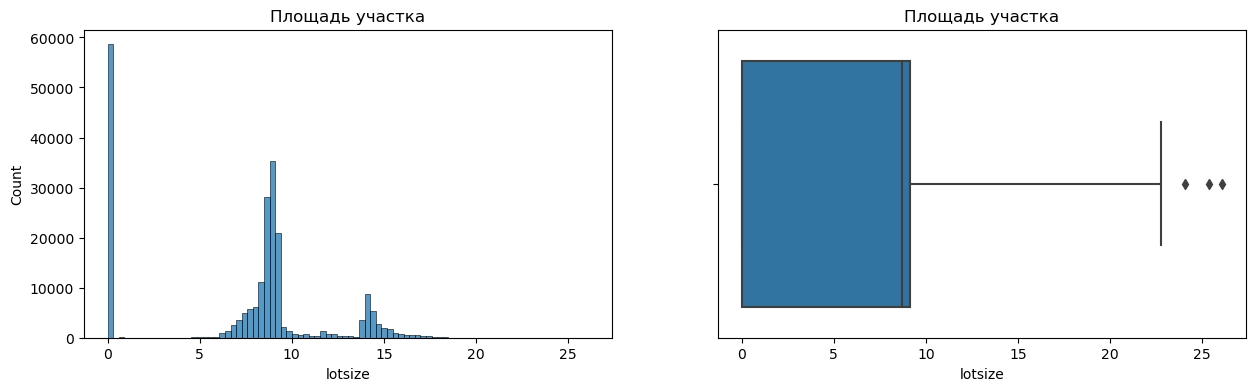

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='lotsize', ax=axes[0]);
histplot.set_title('Площадь участка');
boxplot = sns.boxplot(data=df, x='lotsize', ax=axes[1]);
boxplot.set_title('Площадь участка');

Из графиков видим, что не все дома продаются с участками

In [174]:
outliers3, cleaned3 = outliers_iqr(df, 'lotsize')
print(f'Число выбросов по методу Тьюки: {outliers3.shape[0]}')
print(f'Результирующее число записей: {cleaned3.shape[0]}')

Число выбросов по методу Тьюки: 3
Результирующее число записей: 218741


In [175]:
# всего 3 выброса, удалим их
df = cleaned3.copy()

### city

In [176]:
df['city'].isna().value_counts(normalize=True)

city
False    1.0
Name: proportion, dtype: float64

In [72]:
# удалим путые
df = df.dropna(subset=['city'])

In [92]:
df['city'].value_counts(normalize=True)

city
Houston         0.075999
San Antonio     0.059463
Miami           0.043197
Jacksonville    0.031462
Dallas          0.025372
                  ...   
Whallonsburg    0.000005
Elmendorf       0.000005
White Plains    0.000005
Johns           0.000005
Blue Springs    0.000005
Name: proportion, Length: 1594, dtype: float64

In [93]:
pip install --upgrade category_encoders

In [177]:
# сделаем бинарное кодирование признака city
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(cols=['city']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(df['city'])
df = pd.concat([df, type_bin], axis=1)

In [178]:
# сделаем бинарное кодирование признака state

bin_encoder = ce.BinaryEncoder(cols=['state']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(df['state'])
df = pd.concat([df, type_bin], axis=1)

In [179]:
# закодируем признак тип
df = pd.get_dummies(df, columns=['p_type']) 

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218741 entries, 0 to 377184
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   propertyType               214044 non-null  object 
 1   baths                      186242 non-null  object 
 2   homeFacts                  218741 non-null  object 
 3   fireplace                  218741 non-null  int64  
 4   city                       218741 non-null  object 
 5   schools                    218741 non-null  object 
 6   sqft                       218741 non-null  float64
 7   zipcode                    218741 non-null  object 
 8   beds                       193146 non-null  object 
 9   state                      218741 non-null  object 
 10  target                     218741 non-null  int64  
 11  pool                       218741 non-null  int64  
 12  q_baths                    218741 non-null  float64
 13  q_beds                     218741 

In [181]:
#Удалим лишнее столбцы 
df.drop(['city','beds', 'state', 'Year built', 'Remodeled year', 'Heating', 'Cooling', 'Parking',
         'Price/sqft'], axis = 1, inplace=True)

In [185]:
# функция для вывода признаков с высокой кореляцией
def get_high_correlation(df, threshold=0.7):
    corr = df.corr().abs()
   # high_corr = (corr[(corr > threshold) & (corr != 1)]
    high_corr = (corr[(corr > threshold)]
                      .stack()
                      .reset_index()
                      .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))
    high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']].sort_values(by='correlation', ascending=False)
                      
    return high_corr

In [186]:
high_corr = get_high_correlation(df)
display(high_corr)

,feature_1,feature_2,correlation
7,sch_rating_mean,sch_rating_max,0.854455
8,sch_rating_max,sch_rating_mean,0.854455


In [187]:
# удалим признаки с высокой корреляцие
df.drop(['sch_rating_max'], axis = 1, inplace=True)

перейдем к построению модели

In [188]:
#Составляем список факторов (исключили целевой столбец)!!!
features = df.drop('target', axis=1).columns
X = df[features]
y = df['target']

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
from sklearn.ensemble import RandomForestRegressor 

In [189]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)


 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)

In [190]:
#Рассчитываем RMSE
print('RMSE score: {:.3f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
print('RMSE score: {:.3f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred1) * 100))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred2) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred1)))
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred2)))

RMSE score: 101925.636  $
RMSE score: 96055.139  $
MAPE score: 28.486 %
MAPE score: 27.319 %
R2 score: 0.442
R2 score: 0.504


Видим, что модель случайного леса предсказывает лучше

In [108]:
# col_names = list(df.columns)
# # инициализируем нормализатор RobustScaler
# r_scaler = preprocessing.RobustScaler()

# # кодируем исходный датасет
# df_r = r_scaler.fit_transform(df)

# # Преобразуем промежуточный датасет в полноценный датафрейм 
# df_r = pd.DataFrame(df_r, columns=col_names)

In [109]:
# features = df_r.drop('target', axis=1).columns
# X = df_r[features]
# y = df_r['target']

In [110]:
# # Разделим выборку на тренировочную и тестовую
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.30, random_state=42)

 
# # Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
# regr2 = RandomForestRegressor(
#     max_depth=10, #максимальная глубина дерева
#     n_estimators=10, #количество деревьев в ансамбле
#     random_state=42 #датчик генератора случайных чисел
# )
# # Обучаем модель
# regr2.fit(X_train, y_train)


# # Формируем предсказания каждой из моделей
# #y_pred1 = regr1.predict(X_test)
# y_pred2 = regr2.predict(X_test)
 

# #Рассчитываем RMSE
# #print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
# print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
# #Рассчитываем MAPE
# #print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred1) * 100))
# print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred2) * 100))
# #Рассчитываем коэффициент детерминации
# #print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred1)))
# print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred2)))

RMSE score: 0  $
MAPE score: 94849215666477.594 %
R2 score: 0.504


<Axes: >

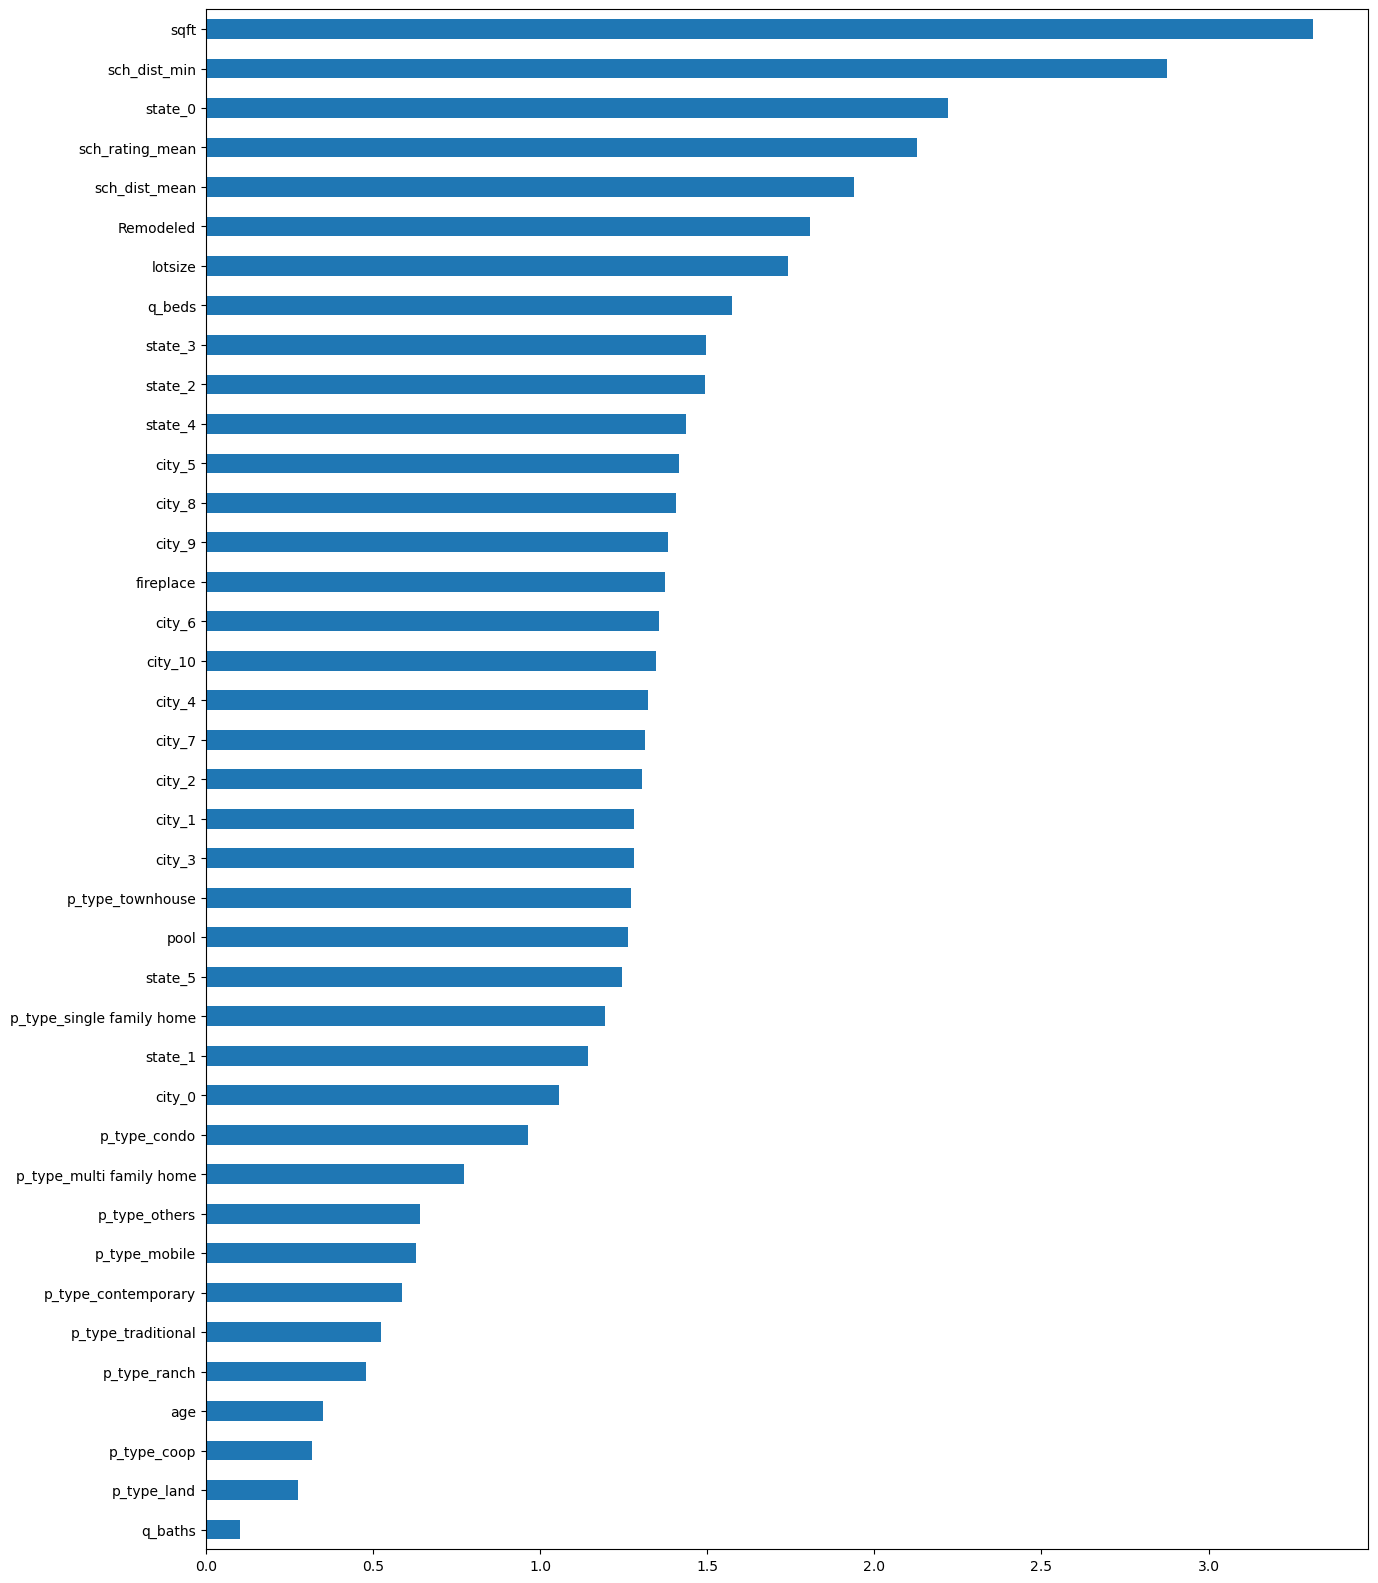

In [191]:
# оценим  значимость признаков
from sklearn.feature_selection import f_classif

y = df.target.values
X = df.drop(['target'], axis=1)

# визуализируем результат анализа значимости:
feat_importances = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
feat_importances.sort_values(inplace = True)



fig5, ax5 = plt.subplots(figsize=(15, 20))
feat_importances.plot(kind = 'barh')

In [192]:
# посмотрим наименее значимые и удалим их
lst_for_drop = feat_importances.nsmallest(7).index.to_list()
df2 = df.copy()
df2.drop(lst_for_drop, axis = 1, inplace=True)
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 218741 entries, 0 to 377184
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fireplace                  218741 non-null  int64  
 1   sqft                       218741 non-null  float64
 2   target                     218741 non-null  int64  
 3   pool                       218741 non-null  int64  
 4   q_beds                     218741 non-null  int64  
 5   sch_rating_mean            218741 non-null  float64
 6   sch_dist_mean              218741 non-null  float64
 7   sch_dist_min               218741 non-null  float64
 8   lotsize                    218741 non-null  float64
 9   Remodeled                  218741 non-null  int64  
 10  city_0                     218741 non-null  int64  
 11  city_1                     218741 non-null  int64  
 12  city_2                     218741 non-null  int64  
 13  city_3                     218741 

In [193]:
features = df2.drop('target', axis=1).columns
X = df2[features]
y = df2['target']

In [194]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

#Случайный лес показывает более хорошие результаты, стром модель на нем
 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
#y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
#Рассчитываем RMSE
#print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
#Рассчитываем MAPE
#print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred1) * 100))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred2) * 100))
#Рассчитываем коэффициент детерминации
#print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred1)))
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred2)))

RMSE score: 98230  $
MAPE score: 27.945 %
R2 score: 0.481


После удаления признаков, метрики ухудшились

Оставим данные без удаления признаков, увеличим глубину и число деревьев в ансамбле

In [195]:
features = df.drop('target', axis=1).columns
X = df[features]
y = df['target']

In [196]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=15, #максимальная глубина дерева
    n_estimators=20, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
#y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 

#Рассчитываем RMSE
#print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))
print('RMSE score: {:.0f}  $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
#Рассчитываем MAPE
#print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred1) * 100))
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_pred2) * 100))
#Рассчитываем коэффициент детерминации
#print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred1)))
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_pred2)))

RMSE score: 78679  $
MAPE score: 20.960 %
R2 score: 0.667


Итак, мы получили модель со следующими метриками:  
RMSE score: 78679  $  
MAPE score: 20.960 %  
R2 score: 0.667  
    
Модель можно доработать, запрпосив дополнительные данные у заказчика, уточнения по признакам (отопление, типы недвижимости и др.)  
Может стоило построить отдельные модели исходя из типов недвижимости